# Analyzing the scraped data
When scraping data from the internet, we often need to do some "sanity checks" to make sure that the collected data is what we expect it to be, because in scraping we are exposed to connection problems, bans from the host, and errors caused by the differences between the HTML structures of different web pages.

In this notebook, you are asked to plot some graphs to explore the data that you have collected and find the problems in it, if any.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import json
import os

## 1. Exploring the downloaded HTML files

### Task 1.1
In this task, you have to plot the distribution of the file sizes of the HTML pages that you have downloaded. Usually, all pages will have a similar size. If you notice that you have a number of files with a significantly different size than the majority of the files, then it may be a good idea to check these files and explore the reason behind this difference. For example, in our code we are saving empty HTML files if we face an error while downloading the web pages. Therefore, seeing a number of files with size zero in the histogram indicates that we have some HTML pages that were not downloaded.

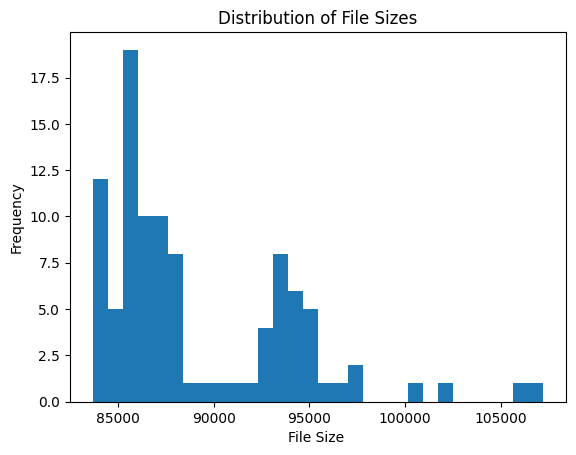

In [2]:
# Plot the distribution of the downloaded HTML file sizes
# WRITE YOUR CODE HERE



# assign directory
dir = 'data/raw_html'
sizeFile = []

# iterate over files in
# that directory

for myFile in os.listdir(dir):
    raw_html = os.path.join(dir, myFile)
    # checking if it is a file
    if os.path.isfile(raw_html):
        sizeFile.append(os.stat(raw_html).st_size)

# Convert file sizes to numpy array
sizeFile = np.array(sizeFile)

# Plot histogram
plt.hist(sizeFile, bins=30)
plt.title('Distribution of File Sizes')
plt.xlabel('File Size ')
plt.ylabel('Frequency')


#create figures folder
if not os.path.exists('figures'):
    os.makedirs('figures')

# Save the final plot in figures/file_sizes.png using the code below
plt.savefig('figures/html_file_size.png')


### Task 1.2
Since the HTML file size is significantly affected by the images it contains, another way to explore the downloaded HTML files is by looking at the number of lines in each file. In this task, you need to plot a distribution of the number of lines in the downloaded HTML files.

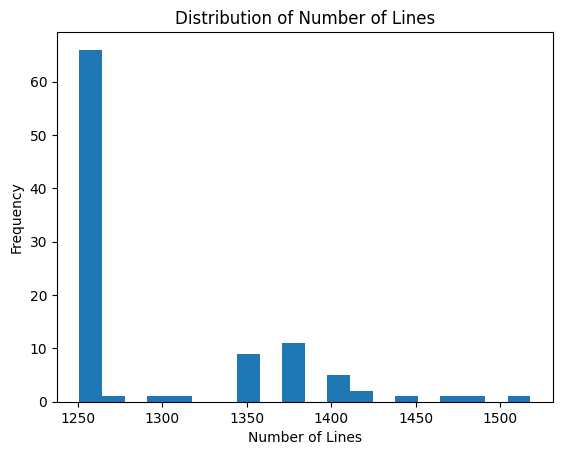

In [3]:
# Plot the distribution of line counts in the downloaded HTML files
# WRITE YOUR CODE HERE

# assign directory
dir = 'data/raw_html'
lines = []

# iterate over files in
# that directory
for myFile in os.listdir(dir):
    raw_html = os.path.join(dir, myFile)
    # checking if it is a file
    if os.path.isfile(raw_html):

        with open(raw_html, 'r') as fp:
            num_lines = len(fp.readlines())
            lines.append(num_lines)
       
# Convert file sizes to numpy array
lines = np.array(lines)

# Plot histogram
plt.hist(lines, bins=20)
plt.title('Distribution of Number of Lines')
plt.xlabel('Number of Lines')
plt.ylabel('Frequency')

    
#create figures folder
if not os.path.exists('figures'):
    os.makedirs('figures')

# Save the final plot in figures/html_line_count.png using the code below
plt.savefig('figures/html_line_count.png')


## 2. Exploring the processed data

### Task 2.1
The first thing to check is if we have extracted information from all of the collected links or not. In this task, you need to compare the number of links that you have collected (in link_list.txt) to the number of parsed data dictionaries (in parsed_data.jsons) that you have created by parsing the downloaded HTML files.

In [4]:
# Compute the number of links in link_list.txt
# WRITE YOUR CODE HERE

with open("data/link_list.txt", 'r') as fp:
    num_lines = len(fp.readlines())

num_lines = num_lines - 1 #because there is unnecessary line at the top

n_collected_links = num_lines

# Compute the number of the parsed data dictionaries in parsed_data.jsons
# WRITE YOUR CODE HERE

with open("data/link_list.txt", 'r') as fp:
    num_lines = len(fp.readlines())

n_parsed_links = num_lines - 1 #because there is unnecessary line creation at the end of the file and in each line we have { } objects


print(f"Number of collected links: {n_collected_links}")
print(f"Number of parsed links: {n_parsed_links}")

Number of collected links: 100
Number of parsed links: 100


### Task 2.2
In this task, you need to plot the distribution of line counts in the text content that you extracted from the HTML web pages. This will help point out some errors in content extraction, if any.

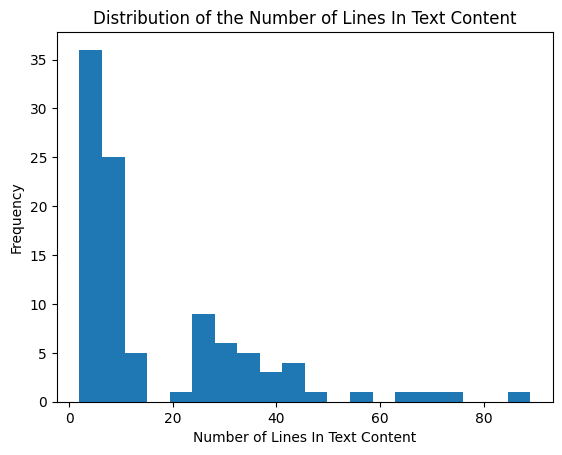

In [5]:
# Plot the distribution of line counts in the extracted text content
# WRITE YOUR CODE HERE




# assign directory
directory = 'data/parsed_data.jsons'

counter = []

# load the JSON data from the file
with open(directory) as f:
    for line in f:
        data = json.loads(line)
        # access the "content" information
        counter.append(data['content'].count("\n"))


# Convert file sizes to numpy array
counter = np.array(counter)

# Plot histogram
plt.hist(counter, bins=20)
plt.title('Distribution of the Number of Lines In Text Content')
plt.xlabel('Number of Lines In Text Content')
plt.ylabel('Frequency')

    
#create figures folder
if not os.path.exists('figures'):
    os.makedirs('figures')



# Save the final plot in figures/content_line_count.png using the code below
plt.savefig('figures/content_line_count.png')

### Task 2.3
In this task, you need to plot the distribution of the dates of the collected news articles.

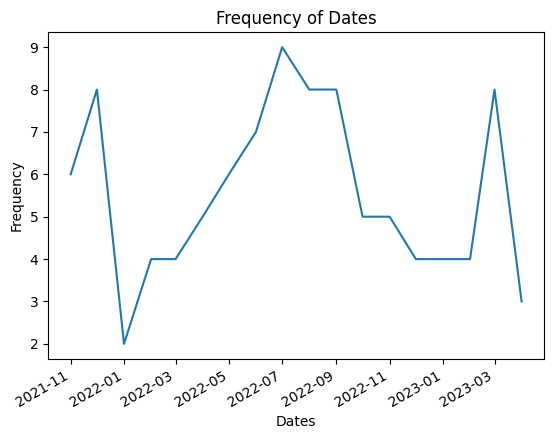

In [6]:
# Plot the distribution of dates from the extracted date information
# WRITE YOUR CODE HERE



# assign directory
directory = 'data/parsed_data.jsons'

dates = []

# load the JSON data from the file
with open(directory) as f:
    for line in f:
        data = json.loads(line)
        # access the "content" information
        dates.append(   (data['date'].split(",")[1]) +  " " + (data['date'].split(",")[0].split(" ")[0][0:3])      )

# convert dates to datetime objects
dates = pd.to_datetime(dates, format=' %Y %b')

# create pandas Series object with datetime objects and count their frequency
freq = pd.Series(dates).value_counts()



# plot the time series
freq.plot() 

plt.title('Frequency of Dates')
plt.xlabel('Dates')
plt.ylabel('Frequency')


plt.plot()



#CODE BELOW MAKES GRAPH ACCORDING TO THE MONTHS BUT I USED TIME SERIES
'''
# Plot the distribution of dates from the extracted date information
# WRITE YOUR CODE HERE



# assign directory
directory = 'data/parsed_data.jsons'

dates = []

# load the JSON data from the file
with open(directory) as f:
    for line in f:
        data = json.loads(line)
        # access the "content" information
        dates.append(       (data['date'].split(",")[0].split(" ")[0][0:3]   )      )


# Convert file sizes to numpy array
dates = np.array(dates)

# Plot histogram
plt.hist(dates, bins=23)
plt.title('Distribution of the Dates')
plt.xlabel('Months')
plt.ylabel('Frequency')

    
#create figures folder
if not os.path.exists('figures'):
    os.makedirs('figures')



# Save the final plot in figures/date_dist.png using the code below
plt.savefig('figures/date_dist.png')
'''



# Save the final plot in figures/date_dist.png using the code below
plt.savefig('figures/date_dist.png')
